In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.keys())
boston.data.shape

In [14]:
boston_1 = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston_1['PRICE']=boston.target

In [16]:
boston_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


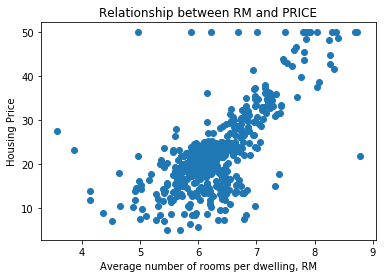

In [31]:
plt.scatter(boston_1.RM,boston_1.PRICE)
plt.xlabel('Average number of rooms per dwelling, RM')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and PRICE')
plt.savefig('RM_PRICE.png')

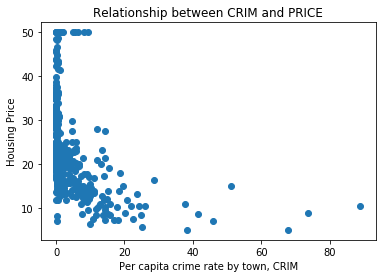

In [37]:
plt.scatter(boston_1.CRIM,boston_1.PRICE)
plt.xlabel('Per capita crime rate by town, CRIM')
plt.ylabel('Housing Price')
plt.title('Relationship between CRIM and PRICE')
plt.savefig('CRIM_PRICE.png')

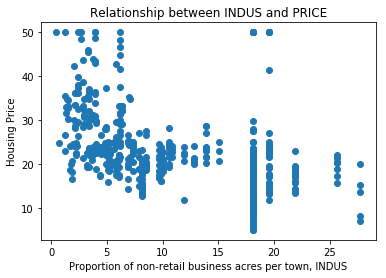

In [38]:
plt.scatter(boston_1.INDUS,boston_1.PRICE)
plt.xlabel('Proportion of non-retail business acres per town, INDUS')
plt.ylabel('Housing Price')
plt.title('Relationship between INDUS and PRICE')
plt.savefig('INDUS_PRICE.png')

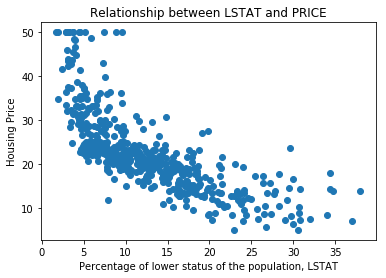

In [39]:
plt.scatter(boston_1.LSTAT,boston_1.PRICE)
plt.xlabel('Percentage of lower status of the population, LSTAT')
plt.ylabel('Housing Price')
plt.title('Relationship between LSTAT and PRICE')
plt.savefig('LSTAT_PRICE.png')

C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


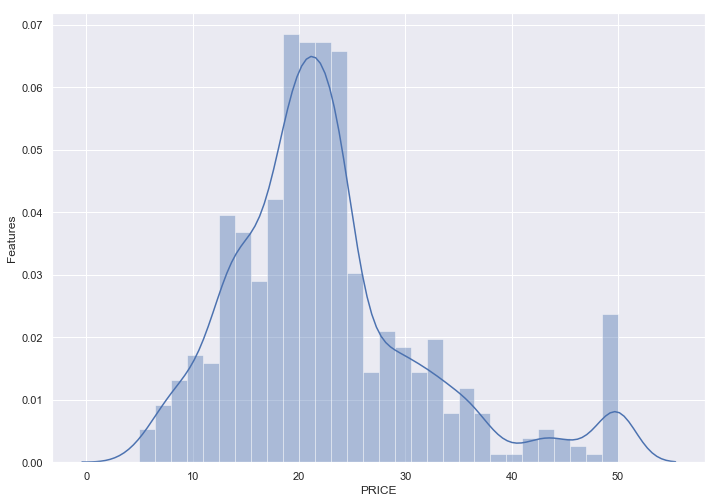

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_1['PRICE'], bins=30)
plt.ylabel('Features')
plt.show()

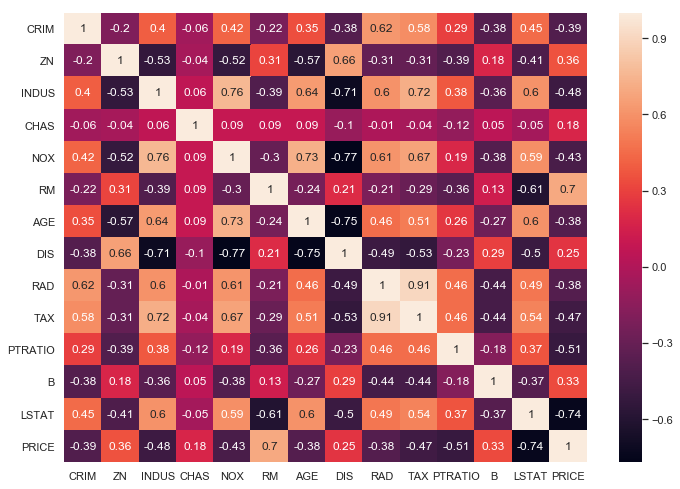

In [46]:
correlation_matrix = boston_1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.png')

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(boston.data,boston.target,
                                              test_size=0.2, random_state=0)

In [62]:
print(X_train.shape)

(404, 13)


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg_model = LinearRegression() 
lin_reg_model.fit(X_train,Y_train)
lin_reg_model.score(X_test,Y_test)

0.5892011519186442

In [99]:
#model evaluation for train data
Y_train_predict = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2 = r2_score(Y_train,Y_train_predict)
print("THe model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")
#model evaluation for test data
Y_test_predict = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2 = r2_score(Y_test,Y_test_predict)
print("THe model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")

THe model performance for training set
--------------------------------------
RMSE is 4.3965917888006585
R2 is 0.7729718726571158


THe model performance for test set
--------------------------------------
RMSE is 5.783658787280859
R2 is 0.5892011519186442




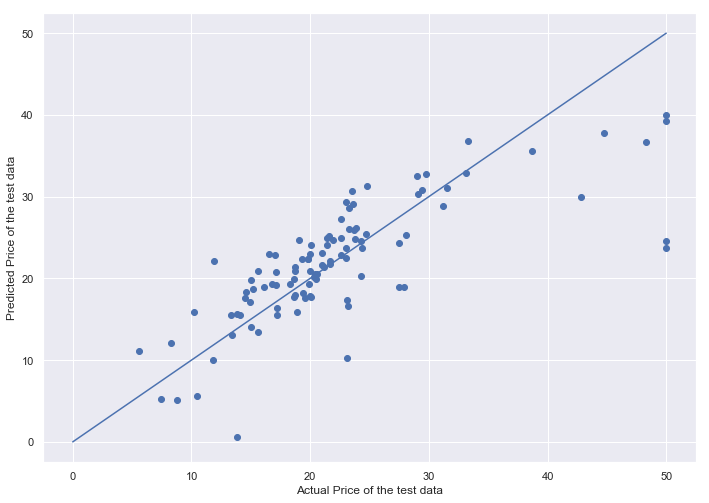

In [89]:
plt.scatter(Y_test,Y_test_predict)
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.xlabel('Actual Price of the test data')
plt.ylabel('Predicted Price of the test data')
plt.show()

In [95]:
print("Co-efficients are:")
lin_reg_model.coef_

Co-efficients are:


array([-1.18410318e-01,  4.47550643e-02,  5.85674689e-03,  2.34230117e+00,
       -1.61634024e+01,  3.70135143e+00, -3.04553661e-03, -1.38664542e+00,
        2.43784171e-01, -1.09856157e-02, -1.04699133e+00,  8.22014729e-03,
       -4.93642452e-01])

In [96]:
print("Intercept is:")
lin_reg_model.intercept_

Intercept is:


38.138692713392714